Lab 6: Text Mining 

Kobie Williams 

2/22/2022

The purpose of this file is to process text to construct feature vectors and use these to identify similar documents

My impressions of data mining and machine learning. Data mining is going through data and finding whatever we are looking for in the data. Machine learning is the machine learning from whatever we have done to our data to achieve some desired outcome.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1u_8wAeimcuUtZSgcDhvhd0SK8KE5fHS5')

In [3]:
df.tail(5)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.dropna()

In [5]:
impressions = df['Impressions']
pd.set_option('display.max_colwidth', None)
impressions.head(5)

0             buzzwordy, but needed. I'm excited to learn deeper methods of data mining and machine learning. Usually when I see machine learning, I assume that people are just applying models, so I'm curious about what we'll learn.
1                                                                                                                                                                                                           I don’t know much about them
2    These two concepts seem intimately intertwined. The DM part of the course seems to be centered around web crawling? And the ML part is more math based with less coding and more "tying togetherness." Very excited for the course.
3                                                        To me, data mining is being able to harvest data of interest to inform and make decisions. And machine learning is teaching machines tasks to increase efficiency and accuracy.
4                    I believe data mining is looking through code a

In [6]:
stop_list = ['a', 'an', 'the', 'and', 'has', 'in', 'had', 'was', 'little', 'to']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer 
#turns everything lowercase 
#removes stopwords 
count_vect = CountVectorizer(lowercase=True, stop_words=stop_list) 

#Extract terms and count occurrences for the impressions data 
sparse_counts = count_vect.fit_transform(df['Impressions'])

count_vect.get_feature_names_out() 

array(['ability', 'able', 'about', 'accuracy', 'aid', 'algorithm', 'am',
       'amazon', 'analysis', 'analytics', 'analyze', 'answers',
       'applying', 'are', 'around', 'artificial', 'assume', 'assuming',
       'automating', 'bad', 'based', 'be', 'become', 'becoming', 'been',
       'being', 'believe', 'big', 'bit', 'boggling', 'both', 'business',
       'but', 'buzzwordy', 'by', 'can', 'capable', 'centered', 'cleaning',
       'code', 'coding', 'comes', 'completing', 'computer', 'computers',
       'concepts', 'condition', 'constructing', 'cool', 'course',
       'crawling', 'curious', 'data', 'databases', 'decisions', 'deeper',
       'degree', 'determine', 'discipline', 'dm', 'do', 'don',
       'dynamically', 'efficiency', 'efficient', 'ever', 'everything',
       'evolving', 'excited', 'experience', 'exposure', 'extremely',
       'fascinating', 'fields', 'financial', 'find', 'fit', 'for',
       'forward', 'from', 'future', 'gathering', 'get', 'good', 'hands',
       'harves

In [8]:
sparse_counts

<24x230 sparse matrix of type '<class 'numpy.int64'>'
	with 374 stored elements in Compressed Sparse Row format>

In [9]:
counts = np.asarray(sparse_counts.todense()) 
counts

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
#printing out the first 10 terms and the counts for the first 5 examles 
feat_idx = range(10)
feat_name = count_vect.get_feature_names_out()[feat_idx] 

print('Counts for feature:', feat_name) 

counts[:, feat_idx] 

Counts for feature: ['ability' 'able' 'about' 'accuracy' 'aid' 'algorithm' 'am' 'amazon'
 'analysis' 'analytics']


array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [11]:
#TF-IDF scores 
from sklearn.feature_extraction.text import TfidfTransformer 

tfidf_transformer = TfidfTransformer() 

#sparse counts with tfidf 
sparse_tfidf = tfidf_transformer.fit_transform(counts) 
tfidf = np.asarray(sparse_tfidf.todense()) 
tfidf 

array([[0.        , 0.        , 0.13910068, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.35205268, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.13156664, 0.        ,
        0.        ],
       ...,
       [0.35958469, 0.        , 0.        , ..., 0.53226667, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

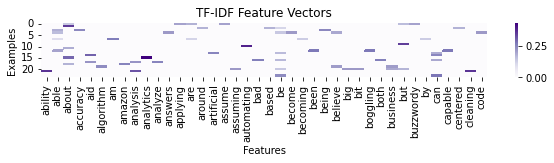

In [14]:
#heat map 
#fColumns = range(40)
plt.figure(figsize=(10,1)) 
sns.heatmap(tfidf[:,:40],square=False, annot=False, cbar=True, cmap="Purples",
            xticklabels=count_vect.get_feature_names_out()[:40]) 
plt.xticks(rotation=90) 
plt.xlabel('Features') 
plt.ylabel('Examples') 
plt.title('TF-IDF Feature Vectors') 
plt.show() 

In [15]:
#
#Using nearest neighbors from our examples to find 
new_example = ["My impressions of data mining and machine learning. Data mining is going through data and finding whatever we are looking for in the data. Machine learning is the machine learning from whatever we have done to our data to achieve some desired outcome."]

new_counts = count_vect.transform(new_example) 

new_tfidf = tfidf_transformer.transform(new_counts) 

new_tfidf = np.asarray(new_tfidf.todense()) 

new_tfidf 



array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.18156912, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.4395771 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [18]:
#to find 5 most similar, use nearest neighbors 

from sklearn.neighbors import NearestNeighbors

#Create the KNN model 
knn = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine') 

model = knn.fit(tfidf) 
model

NearestNeighbors(algorithm='brute', metric='cosine')

In [19]:
distance, neighbor_idx = model.kneighbors(new_tfidf) 

print('Distances to neighbors:\n', distance) 

print('\nNeighbor index:') 
neighbor_idx

Distances to neighbors:
 [[0.62435128 0.65188223 0.66667005 0.70174677 0.72501405]]

Neighbor index:


array([[ 4,  0,  7,  3, 18]])

In [26]:
for i in neighbor_idx: 
  print(i, impressions.iloc[i])

[ 4  0  7  3 18] 4                                                                                                                                                                                                 I believe data mining is looking through code and data to try to find answers to potential questions. Machine learning is programing a machine to be able to learn and improve on its own to become more efficient.
0                                                                                                                                                                                          buzzwordy, but needed. I'm excited to learn deeper methods of data mining and machine learning. Usually when I see machine learning, I assume that people are just applying models, so I'm curious about what we'll learn.
7     I find it fascinating how data mining is becoming increasingly prevalent in fields ranging from sales to financial research and how data scientist are able to some d